In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [3]:
df = pd.read_csv('df_superlimpiooo.csv', index_col= 1)
df.sample(10)

,employeenumber,attrition,businesstravel,dailyrate,distancefromhome,education,educationfield,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,remotework
age,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,"460,0",No,NaN,1192.0,5,2,medical,4,Male,61,3,2,manufacturing director,4,NaN,63470.0,23177,7,No,16,3.0,3,2,8.0,2,2.0,6,0,4,6347.0,1986,No
27,"725,0",No,travel rarely,NaN,1,2,life sciences,3,Female,0,3,3,manufacturing director,1,married,NaN,6009,1,NaN,11,3.0,4,0,9.0,3,3.0,9,0,7,NaN,1996,No
45,"1611,0",No,NaN,1015.0,5,5,NaN,3,Female,50,1,2,laboratory technician,1,NaN,57690.0,23447,1,NaN,14,3.0,1,0,10.0,3,3.0,10,1,4,5769.0,1978,No
33,"992,0",No,non travel,722.0,17,3,NaN,4,Male,38,3,4,manager,3,single,NaN,20489,1,NaN,11,3.0,4,0,10.0,2,3.0,10,6,0,NaN,1990,No
28,"498,0",No,NaN,304.0,9,4,life sciences,2,Male,92,3,2,sales executive,4,single,NaN,20750,1,No,16,3.0,4,0,NaN,1,3.0,7,0,7,NaN,1995,Yes
50,"1539,0",No,NaN,333.0,22,5,NaN,3,Male,88,1,4,research director,4,NaN,144110.0,24450,1,NaN,13,3.0,4,0,NaN,2,3.0,32,13,9,14411.0,1973,No
28,"1056,0",No,travel rarely,1144.0,10,1,medical,4,Male,74,3,1,sales representative,2,married,10520.0,23384,1,No,22,4.0,2,0,NaN,5,3.0,1,0,0,1052.0,1995,Yes
52,"791,0",No,non travel,715.0,19,4,medical,4,Male,41,3,1,research scientist,4,NaN,42580.0,26589,0,No,18,3.0,1,1,NaN,3,3.0,4,1,2,4258.0,1971,Yes
23,"758,0",No,travel rarely,650.0,49,1,NaN,2,Male,37,3,1,laboratory technician,1,NaN,NaN,4344,1,No,14,3.0,4,1,5.0,2,4.0,4,0,2,NaN,2000,Yes


In [21]:
# Obtenemos la lista de columnas numericas que tienen nulos
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['dailyrate', 'monthlyincome', 'performancerating', 'totalworkingyears',
       'worklifebalance', 'sameasmonthlyincome'],
      dtype='object')


In [4]:
#funcion para calcular el porcentaje de valores nulos en las variables categoricas
def calcular_porcentaje_nulos(df, columnas_categoricas):
    porcentaje_nulos = {}
    for columna in columnas_categoricas:
        # Calcular el número de valores nulos
        nulos = df[columna].isnull().sum()
        # Calcular el porcentaje de valores nulos
        porcentaje = (nulos / len(df)) * 100
        # Guardar el resultado en el diccionario
        porcentaje_nulos[columna] = porcentaje
    return porcentaje_nulos

In [5]:
# Lista de columnas categóricas
columnas_categoricas = ['dailyrate', 'worklifebalance', 'performancerating', 'totalworkingyears', 'monthlyincome','sameasmonthlyincome']

In [63]:
porcentajes_nulos = calcular_porcentaje_nulos(df, columnas_categoricas)

for columna, porcentaje in porcentajes_nulos.items():
    print(f"{columna}: {porcentaje:.2f}%")

dailyrate: 7.68%
worklifebalance: 6.69%
performancerating: 12.08%
totalworkingyears: 32.59%
monthlyincome: 52.23%
sameasmonthlyincome: 52.23%


In [6]:
# Lista de columnas específicas de interés
columnas_especificas = ['dailyrate', 'worklifebalance', 'performancerating', 'totalworkingyears', 'monthlyincome','sameasmonthlyincome']

# Asegurarse de que las columnas existen en el DataFrame
columnas_especificas = [col for col in columnas_especificas if col in df.columns]

# Mostrar la mediana y la media para cada columna específica
for col in columnas_especificas:
    print(f"Mediana y Media para la columna {col.upper()}:")
    mediana = df[col].median()
    media = df[col].mean()
    print(f"Mediana: {mediana}")
    print(f"Media: {media}")
    print("........................")


Mediana y Media para la columna DAILYRATE:
Mediana: 798.0
Media: 802.0852348993288
........................
Mediana y Media para la columna WORKLIFEBALANCE:
Mediana: 3.0
Media: 2.759628154050465
........................
Mediana y Media para la columna PERFORMANCERATING:
Mediana: 3.0
Media: 3.150810429880197
........................
Mediana y Media para la columna TOTALWORKINGYEARS:
Mediana: 10.0
Media: 11.318933823529411
........................
Mediana y Media para la columna MONTHLYINCOME:
Mediana: 48590.0
Media: 64776.86121919585
........................
Mediana y Media para la columna SAMEASMONTHLYINCOME:
Mediana: 4859.0
Media: 6477.686121919585
........................


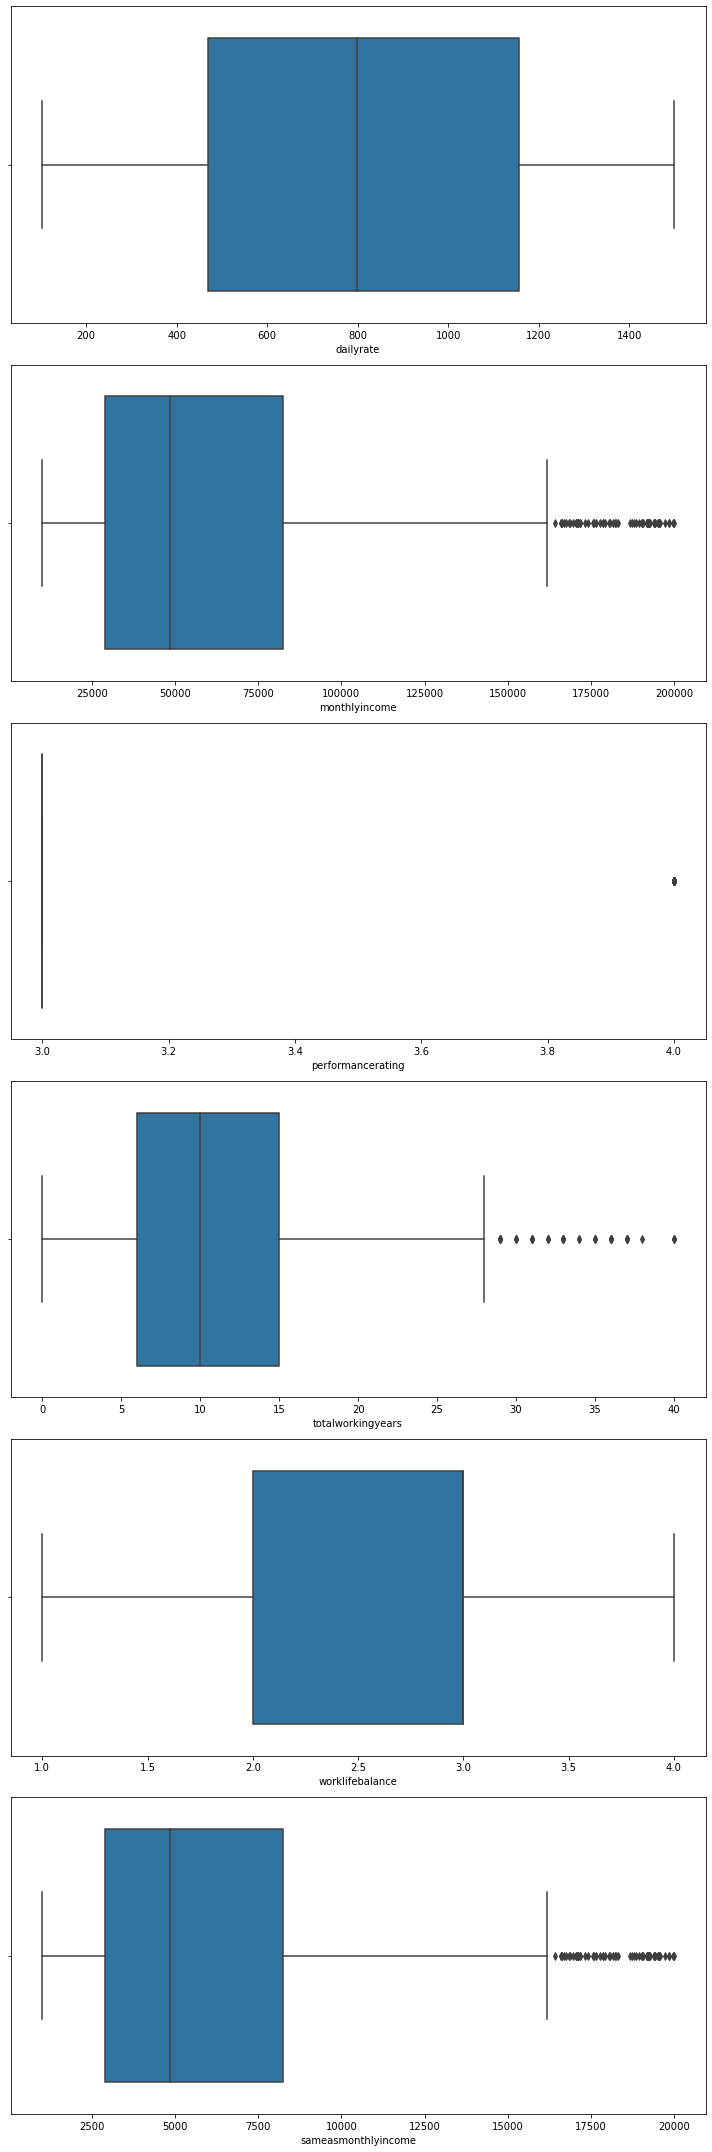

In [7]:
# Crear gráficos de caja para las columnas numéricas con valores nulos
fig, axes = plt.subplots(nrows=len(nulos_esta_num), ncols=1, figsize=(10, 5*len(nulos_esta_num)))
axes = axes.flatten()

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x=col, data=df, ax=axes[indice])

plt.tight_layout()
plt.show()


#### Reviso mis tres columnas

In [30]:
df['dailyrate'].isnull().sum()

124

In [45]:
df['dailyrate'].unique()

array([ 684.,  699.,  532.,  359., 1319.,  117., 1435.,  635., 1276.,
        840.,  247., 1369.,  201., 1360.,  692., 1398.,  286., 1402.,
        819.,  884., 1238.,  515., 1223.,  202.,  928.,  607.,  266.,
        429.,  589.,   nan, 1180., 1282.,  776.,  665.,  526., 1034.,
       1403., 1499.,  580.,  859.,  263., 1376.,  885., 1003., 1321.,
        394., 1372., 1333.,  228.,  737.,  823.,  667.,  301.,  573.,
       1329.,  630., 1063., 1017., 1296.,  939., 1355., 1448.,  200.,
       1202.,  404.,  208.,  813.,  465., 1189., 1001., 1394.,  161.,
        288.,  682., 1354.,  147.,  119., 1413.,  452.,  334., 1132.,
        982.,  480., 1099.,  672., 1379.,  583., 1492., 1050.,  469.,
        237., 1440., 1291., 1157., 1336., 1224.,  735., 1389.,  638.,
       1240.,  194., 1339.,  111., 1469.,  470., 1232., 1249.,  798.,
        549.,  570.,  541.,  164., 1117.,  619.,  319.,  956., 1245.,
       1397.,  527.,  213.,  882.,  330.,  406.,  217.,  481.,  669.,
       1465.,  685.,

------

In [40]:
df['performancerating'].isnull().sum()

195

In [44]:
df['performancerating'].unique()

array([ 3.,  4., nan])

In [52]:
df['performancerating'].value_counts()

performancerating
3.0    1205
4.0     214
Name: count, dtype: int64

------

In [41]:
df['worklifebalance'].isnull().sum()

108

In [43]:
df['worklifebalance'].unique()

array([ 3., nan,  2.,  4.,  1.])

In [51]:
df['worklifebalance'].value_counts()

worklifebalance
3.0    913
2.0    359
4.0    155
1.0     79
Name: count, dtype: int64

#### `Cambio los nulos por la media porque no tienen valores atipicos`

In [69]:
# Lista de columnas específicas de interés
columnas_3 = ['dailyrate', 'worklifebalance', 'performancerating']

# Asegurarse de que las columnas existen en el DataFrame
columnas_3 = [col for col in columnas_3 if col in df.columns]

# Calcular la media para cada columna específica y rellenar los valores nulos
for col in columnas_3:
    media = df[col].mean()
    df[col].fillna(media, inplace=True)

# Comprobar los nulos para cada columna específica
for col in columnas_3:
    print(f"Después del 'fillna' la columna {col.upper()} tiene {df[col].isnull().sum()} nulos")


Después del 'fillna' la columna DAILYRATE tiene 0 nulos
Después del 'fillna' la columna WORKLIFEBALANCE tiene 0 nulos
Después del 'fillna' la columna PERFORMANCERATING tiene 0 nulos


/var/folders/cb/k7746bq95ql69k6dhd_7nc3w0000gn/T/ipykernel_16726/4039544653.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(media, inplace=True)


Columna totalworkingyears - Se concluye que los nulos se cambiarán por la Mediana ya que tenemos valores atípicos

In [8]:
df['totalworkingyears'].isnull().sum()

526

In [9]:
df['totalworkingyears'].value_counts()

totalworkingyears
10.0    144
8.0      86
6.0      84
9.0      69
5.0      66
7.0      56
4.0      54
1.0      53
12.0     34
3.0      32
14.0     30
13.0     30
11.0     29
15.0     28
16.0     28
20.0     28
18.0     27
21.0     23
17.0     22
2.0      21
22.0     18
19.0     17
24.0     14
23.0     13
28.0     13
26.0      8
0.0       8
29.0      6
36.0      6
25.0      6
33.0      6
37.0      5
27.0      5
31.0      4
30.0      3
32.0      3
35.0      3
40.0      3
34.0      2
38.0      1
Name: count, dtype: int64

In [12]:
df['totalworkingyears'].describe()

count    1088.000000
mean       11.318934
std         7.727675
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: totalworkingyears, dtype: float64

In [18]:
# Calcular la mediana de la columna 'totalworkingyears' y rellenar los valores nulos
mediana = df['totalworkingyears'].median()
df['totalworkingyears'].fillna(mediana, inplace=True)

# Comprobar los nulos para cada columna específica
print(f"Después del 'fillna' la columna 'totalworkingyears' tiene {df['totalworkingyears'].isnull().sum()} nulos")

Después del 'fillna' la columna 'totalworkingyears' tiene 0 nulos


Columna employeenumber 

In [22]:
df.columns

Index(['employeenumber', 'attrition', 'businesstravel', 'dailyrate',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'sameasmonthlyincome', 'datebirth',
       'remotework'],
      dtype='object')

In [4]:
df['employeenumber'].isnull().sum()

431

In [5]:
df['employeenumber'].describe()

count      1183
unique     1079
top       482,0
freq          2
Name: employeenumber, dtype: object

Como employeenumber es una columna que nos puede indicar un valor unico para cada registro, asignaremos valores nuevos a los nulos

In [40]:
# Encontrar el valor máximo actual de 'employeenumber'
max_value = df['employeenumber'].max()

# Generar nuevos números únicos para los valores nulos
null_indices = df['employeenumber'].isnull()
df.loc[null_indices, 'employeenumber'] = range(int(max_value) + 1, int(max_value) + 1 + null_indices.sum())

# Convertir la columna 'employeenumber' a tipo int nuevamente, en caso de que se haya convertido a float
df['employeenumber'] = df['employeenumber'].astype(int)

# Verificar el resultado
print(df.head())

     employeenumber attrition businesstravel  dailyrate  distancefromhome  \
age                                                                         
51             1620        No            NaN      684.0                 6   
52             2590        No            NaN      699.0                 1   
42             3190        No  travel rarely      532.0                 4   
47            20681        No  travel rarely      359.0                 2   
46            20682        No            NaN     1319.0                 3   

     education    educationfield  environmentsatisfaction  gender  hourlyrate  \
age                                                                             
51           3               NaN                        1    Male          51   
52           4     life sciences                        3    Male          65   
42           2  technical degree                        3    Male          58   
47           4           medical                       